## Imports

In [ ]:
from initial import preprocessing as init_processing
from initial.dataset_from_raw import dataset_from_raw
from config import Config
import utils
import numpy as np


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Raw Dataset

In [ ]:
!wget https://filebox.ece.vt.edu/~vrama91/CIDEr_miscellanous/cider_datasets.tarB
!tar -xvf cider_datasets.tar

In [ ]:
dataset_from_raw()

## Initial dataset preprocessing

Removing the duplicate sentences.

In [ ]:
init_processing.annots_preprocessing()

# Extracting target from given annotations

**Extraction of target is done in the following steps:**

1. Finding direct match of the label in the lemmatized words.
    E.g.: if the lemmatized words contain the word “cat” the we assume the image has “cat”

2. Finding closest match of the label in the lemmatized words.
E.g.:  if the lemmatized words contain the word “parrot” the we assume the image has “bird”

3. Named entity recognizer.

### Named Entity Recognizer

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [ ]:
doc = nlp("Mike and Sam are playing chess in the room")
displacy.render(doc, style='ent', jupyter=True)

### Extracting

In [ ]:
exp_targets_, targets_ = utils.get_targets(Config.abstract50s)
exp_targets, targets = utils.get_targets(Config.pascal50s)

### Loading Images

In [ ]:
images_ = utils.get_images(Config.abstract50s)
images = utils.get_images(Config.pascal50s)

# Caching data

In [ ]:
np.save('cache/abstract_images.npy', images_)
np.save('cache/abstract_targets.npy', targets_)

In [ ]:
np.save('cache/pascal_images.npy', images)
np.save('cache/pascal_targets.npy', targets)


# Sampling & Validating targets

In [ ]:
abstract_targets = np.load('cache/abstract_targets.npy')
pascal_targets = np.load('cache/pascal_targets.npy')

In [ ]:
labels = Config.labels[:-1]
labels[-1] = 'tv/moniter'
labels = np.array(labels)


A dog yawning on a porch.
A dog is barking while lying down on a wooden porch.
A dog lays on a porch near stairs.
The dog is lying at the top of the stairs.
The dog is laying on the deck.
A dog reclines outdoors on the top of a set of porch stairs.
A dog lying on a deck with it's mouth open.
A dog barking on the deck.
The dog lays happily on the deck.
A dog sits panting on top of a set of stairs.
a dog relaxing on a wooden deck
A dog is lying on a wooden porch.
The dog barks at intruders to protect his master's home.
A black and brown dog sitting on top of a wooden porch.
A barking dog is sitting atop a wooden deck.
A dog is laying on the porch.
dog laying on a deck
A dog is sitting at on a deck.
A dog lying on a wooden deck at the top of some stairs.
A deck with a dog laying on it.
A dog laying on a back porch.
A dog is laying on the top of some steps
A dog is lying down on a wooden deck and yawning.
A picture of a dog on a porch.
A dog is sleeping on top of a steps.
A large brown an

dict_keys(['dog'])

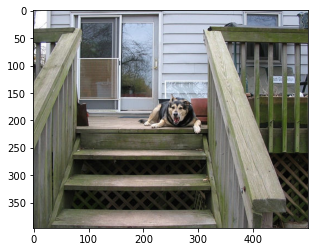

In [ ]:
index = 7

utils.show_example(Config.pascal50s, index)
{k:v for k, v in zip(labels, pascal_targets[index]) if v == 1}.keys()